In [2]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv('vgames2.csv',thousands = ',')
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [31]:
# # 연도별로 1 이거나 아예 없는것도 확인 ex)80.0 ,1,0.1...
year = df.Year.unique()
temp = []
for i in year:
    if i <= 1900:
        print(i)
        temp.append(i)

9.0
97.0
11.0
15.0
3.0
96.0
6.0
8.0
1.0
5.0
4.0
10.0
98.0
7.0
16.0
86.0
14.0
95.0
2.0
13.0
0.0
12.0
94.0


In [32]:
df.loc[(df.Year.values <= 80), 'Year'] += 2000
df.loc[((df.Year.values >= 80) & (df.Year.values <= 100)), 'Year'] += 1900

# 변경확인
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [33]:
# Sales 값 처리
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) /1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', ''))
        return float(x)
    if x in x:
        return float(x.replace('x', '')) 
    return float(x)

df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [34]:
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [35]:
df.head(12)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01


In [36]:
df = df.dropna()
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [37]:
df.isnull().sum().sum() 

0

In [38]:
df1 = df.drop(['Unnamed: 0'],axis=1)
df1
df1.dtypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [39]:
# EU_sales 장르 인기도 그래프
import matplotlib.pyplot as plt

eu_sum = df1.groupby('Genre').EU_Sales.sum()
eu_sum


Genre
Action          513.64
Adventure        63.66
Fighting         99.90
Misc            208.15
Platform        200.63
Puzzle           50.47
Racing          235.02
Role-Playing    183.09
Shooter         310.23
Simulation      112.99
Sports          370.97
Strategy         44.82
Name: EU_Sales, dtype: float64

In [66]:
label = ['Act', 'ADV','Fight ','Misc','Platform','Puzz','Racing','RPG','Shoot','Sim','Sports','RTS' ]

index = np.arange(len(label))

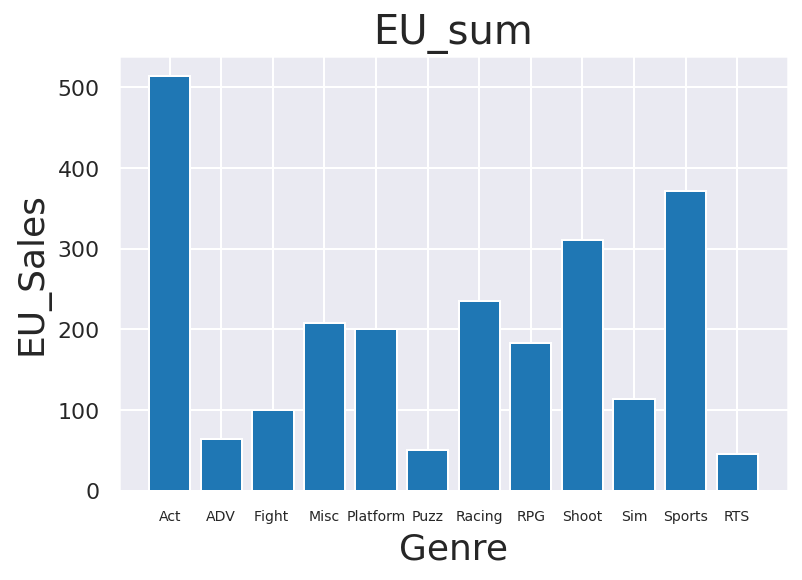

In [67]:
plt.bar(index, eu_sum)

plt.title('EU_sum', fontsize=20)

plt.xlabel('Genre', fontsize=18)

plt.ylabel('EU_Sales', fontsize=18)

plt.xticks(index, label, fontsize=7)

plt.show()


In [68]:
# NA_Sales 장르 인기도
na_sum = df1.groupby('Genre').NA_Sales.sum()
na_sum
label = ['Act', 'ADV','Fight ','Misc','Platform','Puzz','Racing','RPG','Shoot','Sim','Sports','RTS' ]
index = np.arange(len(label))

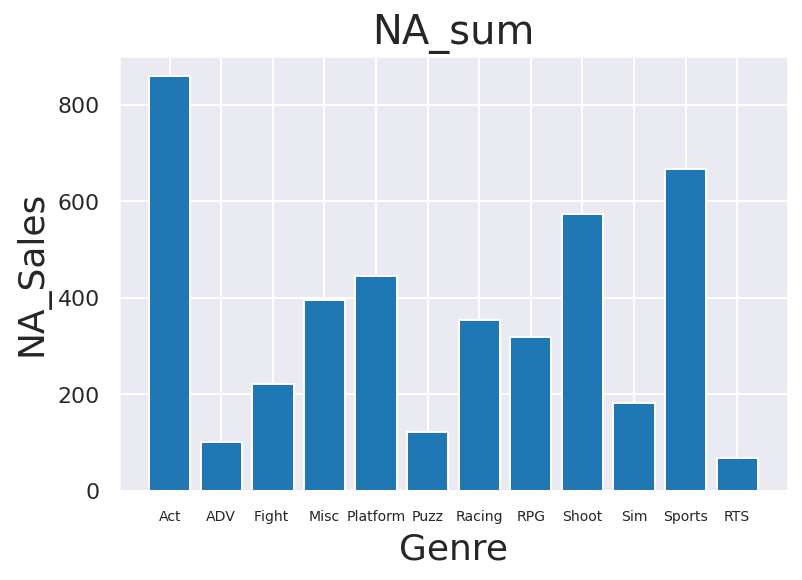

In [69]:
plt.bar(index, na_sum)

plt.title('NA_sum', fontsize=20)

plt.xlabel('Genre', fontsize=18)

plt.ylabel('NA_Sales', fontsize=18)

plt.xticks(index, label, fontsize=7)

plt.show()

In [70]:
# JP_Sales 장르 인기도
jp_sum = df1.groupby('Genre').JP_Sales.sum()
jp_sum
label = ['Act', 'ADV','Fight ','Misc','Platform','Puzz','Racing','RPG','Shoot','Sim','Sports','RTS' ]
index = np.arange(len(label))

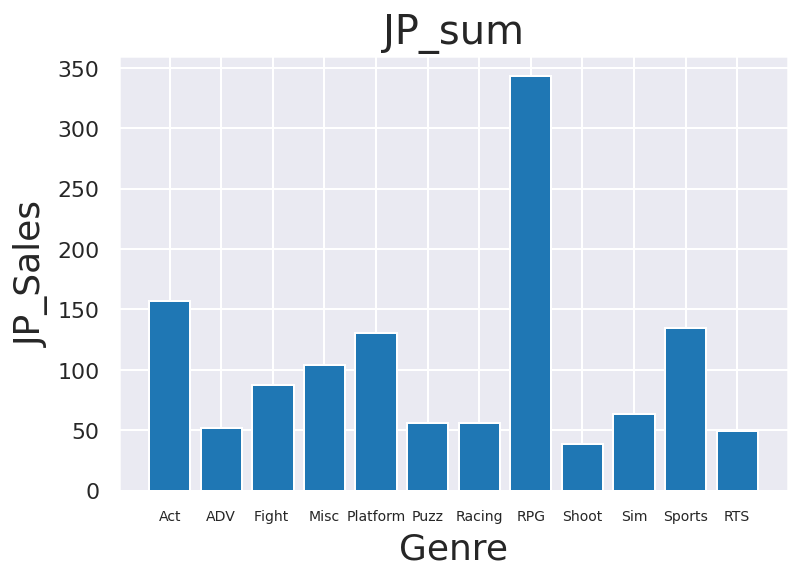

In [71]:
plt.bar(index, jp_sum)

plt.title('JP_sum', fontsize=20)

plt.xlabel('Genre', fontsize=18)

plt.ylabel('JP_Sales', fontsize=18)

plt.xticks(index, label, fontsize=7)

plt.show()

In [72]:
# Other_Sales 장르 인기도
other_sum = df1.groupby('Genre').Other_Sales.sum()
other_sum
label = ['Act', 'ADV','Fight ','Misc','Platform','Puzz','Racing','RPG','Shoot','Sim','Sports','RTS' ]
index = np.arange(len(label))

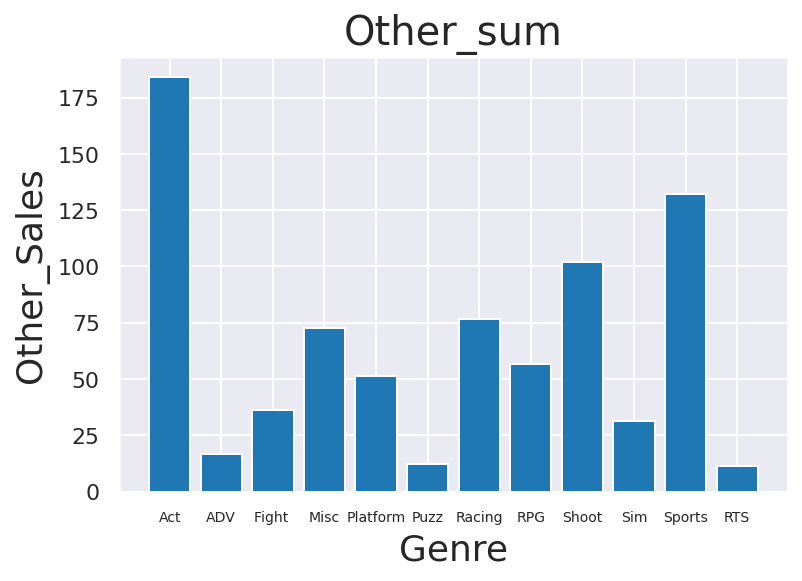

In [73]:
plt.bar(index, other_sum)

plt.title('Other_sum', fontsize=20)

plt.xlabel('Genre', fontsize=18)

plt.ylabel('Other_Sales', fontsize=18)

plt.xticks(index, label, fontsize=7)

plt.show()

In [74]:
# 북미는 액션>스포츠>슛팅게임 장르가 인기도 탑 3 
# 유럽도 북미랑 거의 흡사한 액션>스포츠>슛팅
# 일본은 RPG>액션>스포츠 인기도 이지만  RPG 장르 가 절대적으로 선호도 높았다.
# 다른 나라는  액션>스포츠>슛팅 북미 유럽과 비슷했다.
# 일본을 제외한 나라들은 대부분 액션>스포츠>슛팅 장르를 선호도가 높음
# 그러나 일본도 액션 슛팅 장르또한 인기가 있다.

In [75]:
# 새로운 컬럼 만들기 각나라 출고량합
cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df1['Global_Sales'] = df1[cols].sum(axis=1)
df1.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [76]:
# 년도별 최고 출고량 그래프 만들기 
# 년도별 장르 갯수

year_max_df1 = df1.groupby(['Year', 'Genre']).size().reset_index(name='count')

# 가장 값이 큰 값만 뽑기

year_max_idx = year_max_df1.groupby(['Year'])['count'].transform(max) == year_max_df1['count']
year_max_genre = year_max_df1[year_max_idx].reset_index(drop=True)

# 중복값 제외하기

year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_genre[:5]
year_max_genre.columns = ['YEAR', 'GENRE', 'COUNT']

# 장르값 할당

genre = year_max_genre['GENRE'].values

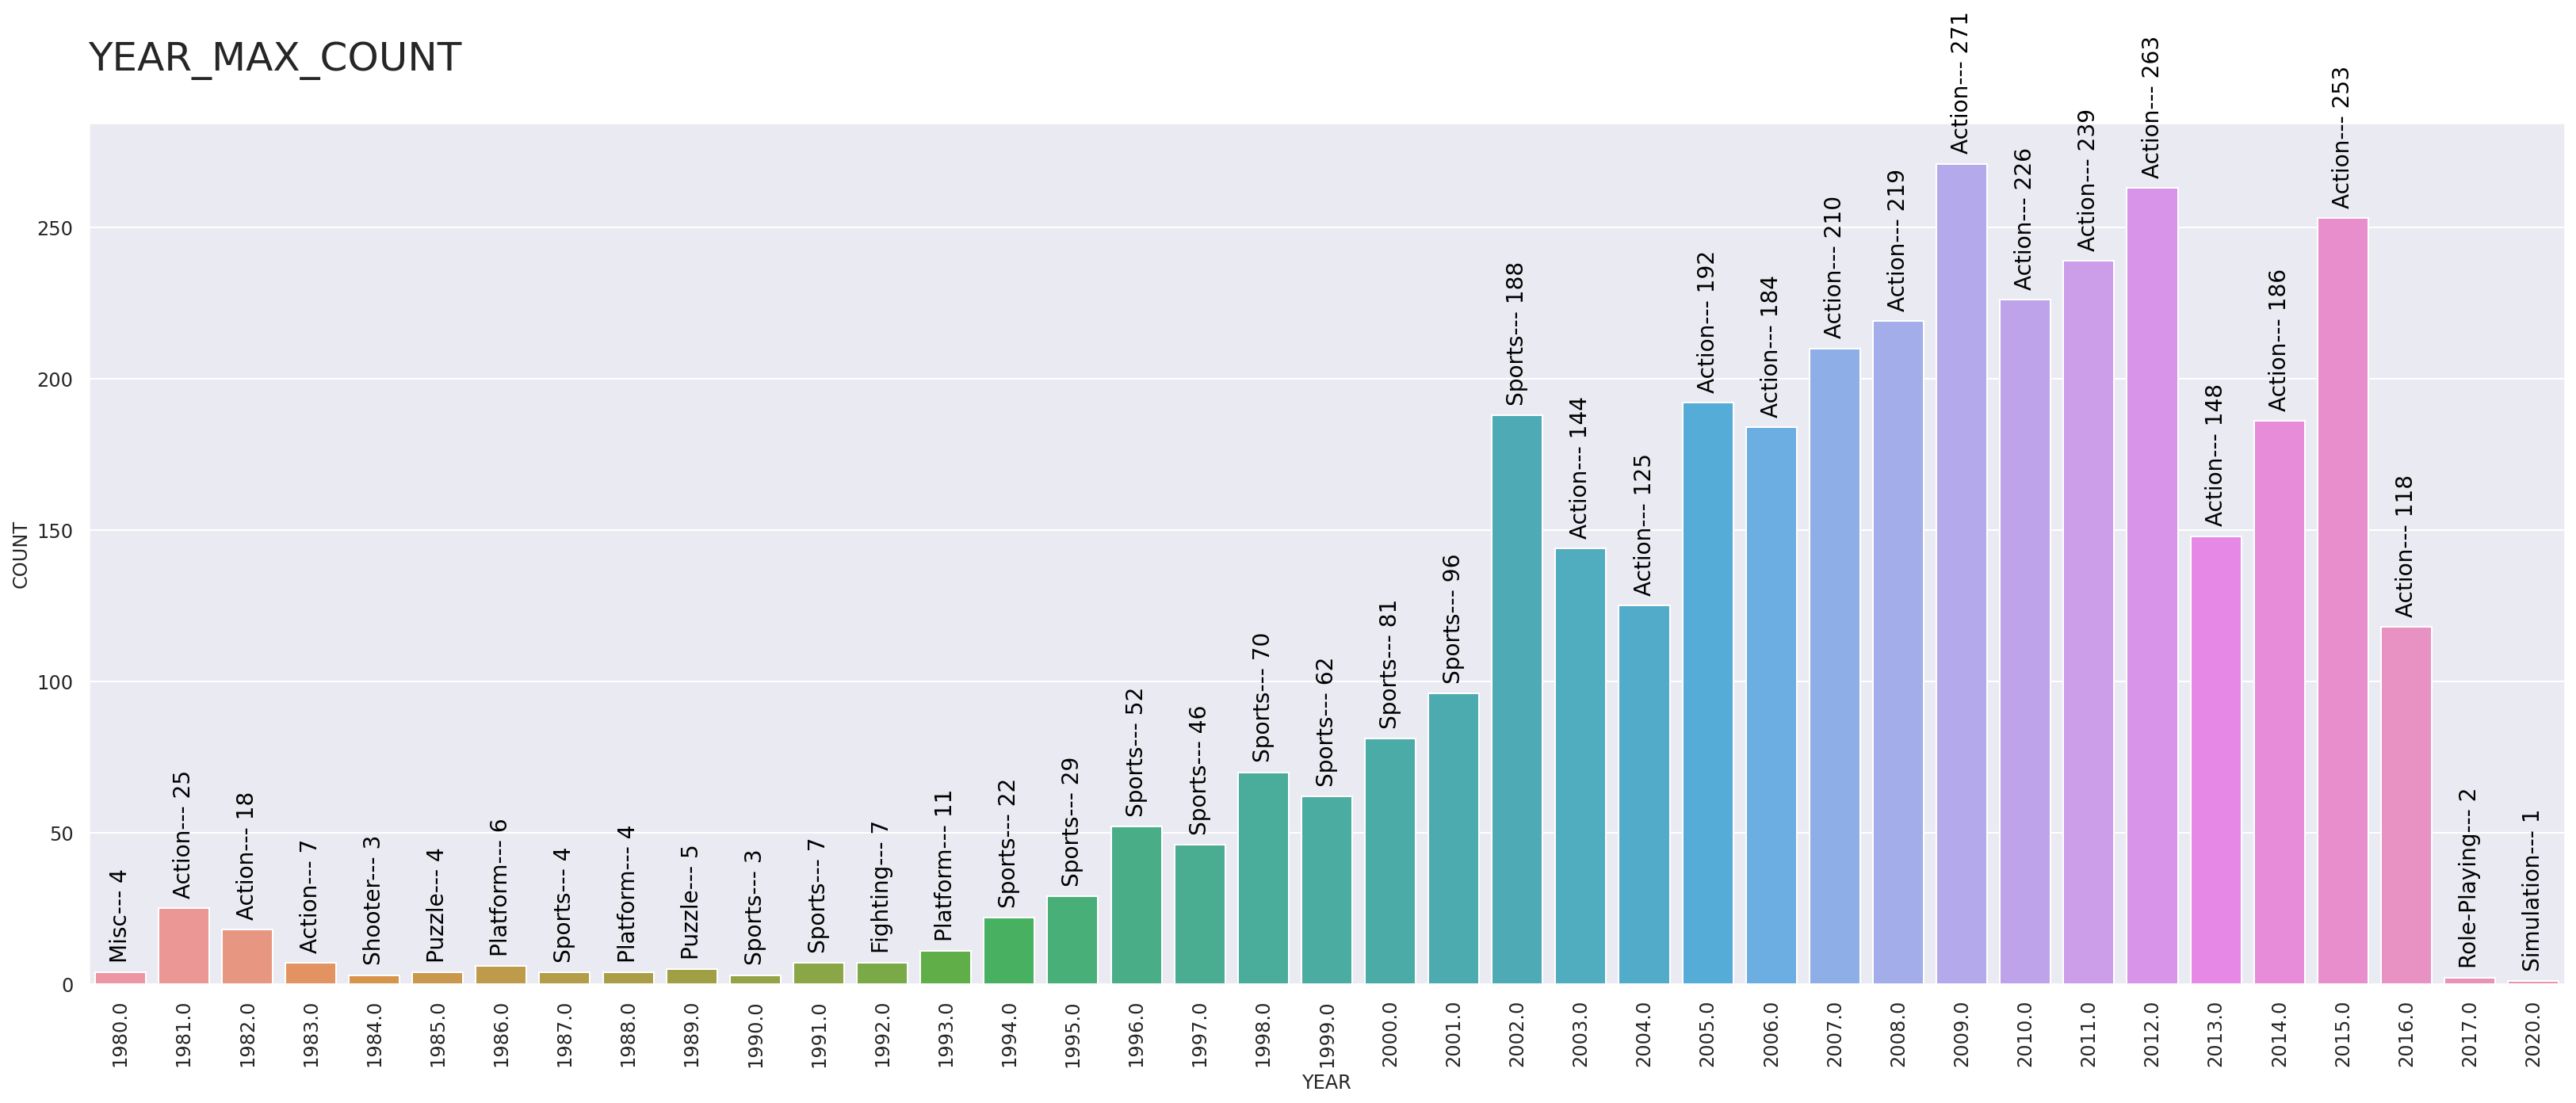

In [77]:
# 스타일 변경


sns.set_context('notebook')
sns.set_style('darkgrid')


plt.figure(figsize=(28,10))
ax = sns.barplot(x='YEAR', y='COUNT', data=year_max_genre )
idx = 0
for value in year_max_genre['COUNT']:
    ax.text(x=idx, y=value + 5, s=str(genre[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('YEAR', fontsize=12)
plt.ylabel('COUNT', fontsize=12)
ax.set_title('YEAR_MAX_COUNT', fontsize=25, y=1.05, loc='left')
plt.show()

In [ ]:
# 94년 부터 2000년대 까지 스포츠 장르가 활발하게 출고량이 높았으며, 2003년부터 액션 장르가 가장 왕성하게 매우높은 출고량을 찍었다.

In [78]:
# 각 나라 플랫폼별 판매량 

plat_sales = df1[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
plat_sales.columns = ['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
plat_sales_grouped = plat_sales.groupby(by=['platform']).sum()
plat_sales_df = plat_sales_grouped.reset_index()
plat_sales_mt = pd.melt(plat_sales_df, id_vars=['platform'], value_vars=plat_sales.columns[1:],
                         var_name='sales_nation', value_name='sales_rate')

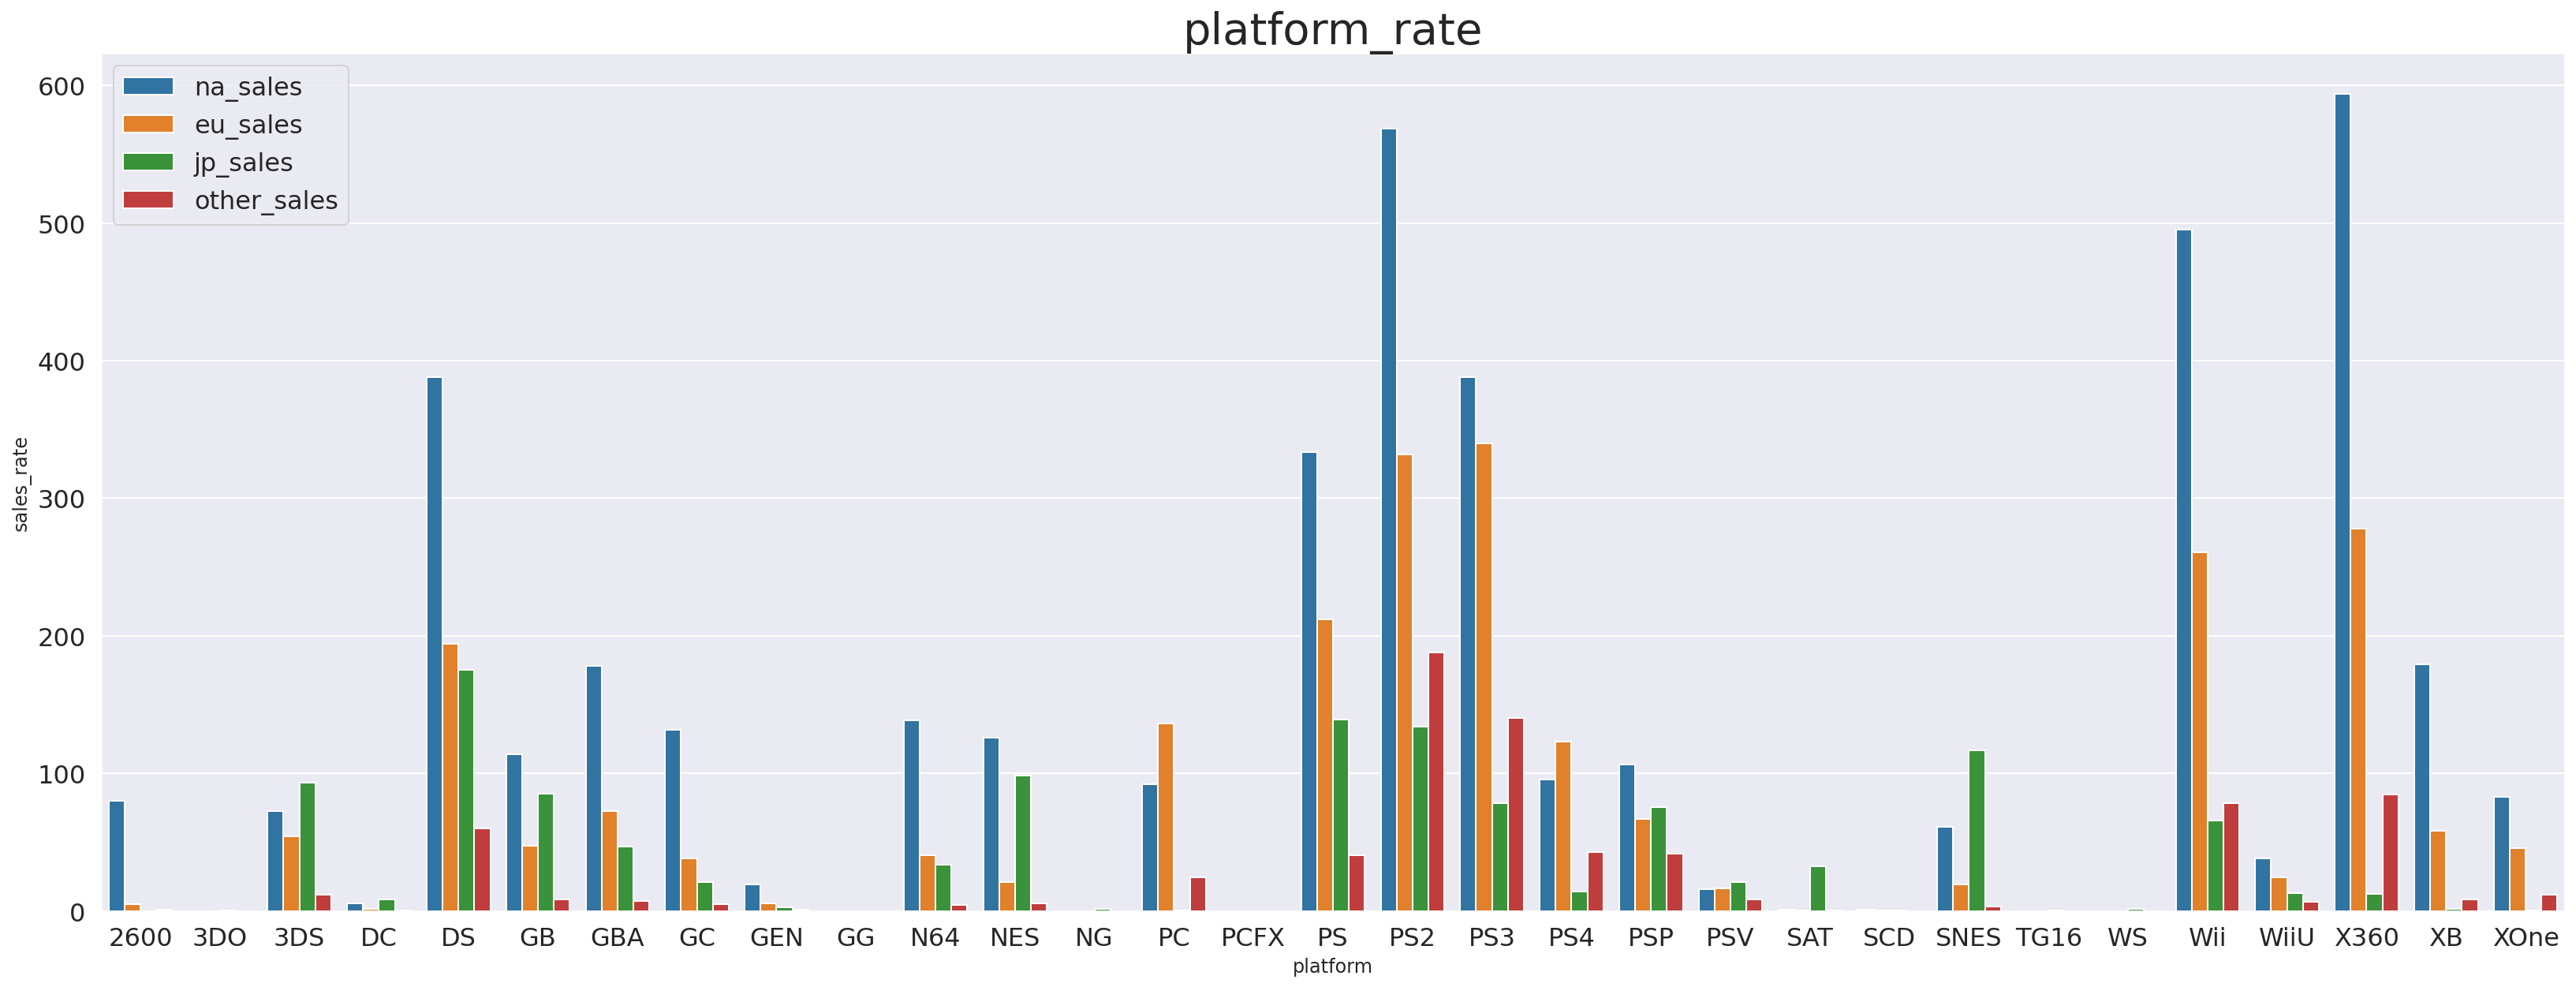

In [79]:
plt.figure(figsize=(28,10))
ax = sns.barplot(x='platform', y='sales_rate', hue='sales_nation', data=plat_sales_mt)
ax.set_title('platform_rate', fontsize=28)
ax.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
# 소니 PS 가 가장 고르게 각 나라별로 잘 팔린 기종
# 닌텐도 WILL, DS , 마이크로소프트 XBOX360 이 북미 유럽쪽에서 선호도가 높음

In [46]:
# 역대 탑텐 판매량 게임

sales_top10 = df1.loc[df1.Global_Sales.sort_values(ascending=False).index].reset_index(drop=True).head(10)
rank = [str(x)+' rank' for x in range(1, 11)]
sales_top10['rank'] = rank
sales_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rank
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1 rank
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2 rank
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3 rank
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4 rank
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5 rank
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6 rank
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7 rank
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,8 rank
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,9 rank
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,10 rank


In [ ]:
# 역대 게임중 닌텐도 회사의 제품이 누적으로 많이 팔렸다.

In [86]:
# 최근 10년동안 판매량 게임 탑텐
year_sales_top_game = df1[df1.Year >= 2011].sort_values('Global_Sales', ascending=False).head(10)
year_sales_top_game = year_sales_top_game.reset_index(drop=True)
rank = [str(x)+' rank' for x in range(1, 11)]
year_sales_top_game[' rank'] = rank
year_sales_top_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rank
0,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,1 rank
1,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,2 rank
2,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,3 rank
3,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,4 rank
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.04,5 rank
5,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.74,6 rank
6,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.47,7 rank
7,Mario Kart 7,3DS,2011.0,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21,8 rank
8,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99,9 rank
9,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,10 rank


In [ ]:
# 최근 10년 기준으로 GTA 시리즈 , 콜오브듀티 시리즈가 많이 흥행을 하였다.

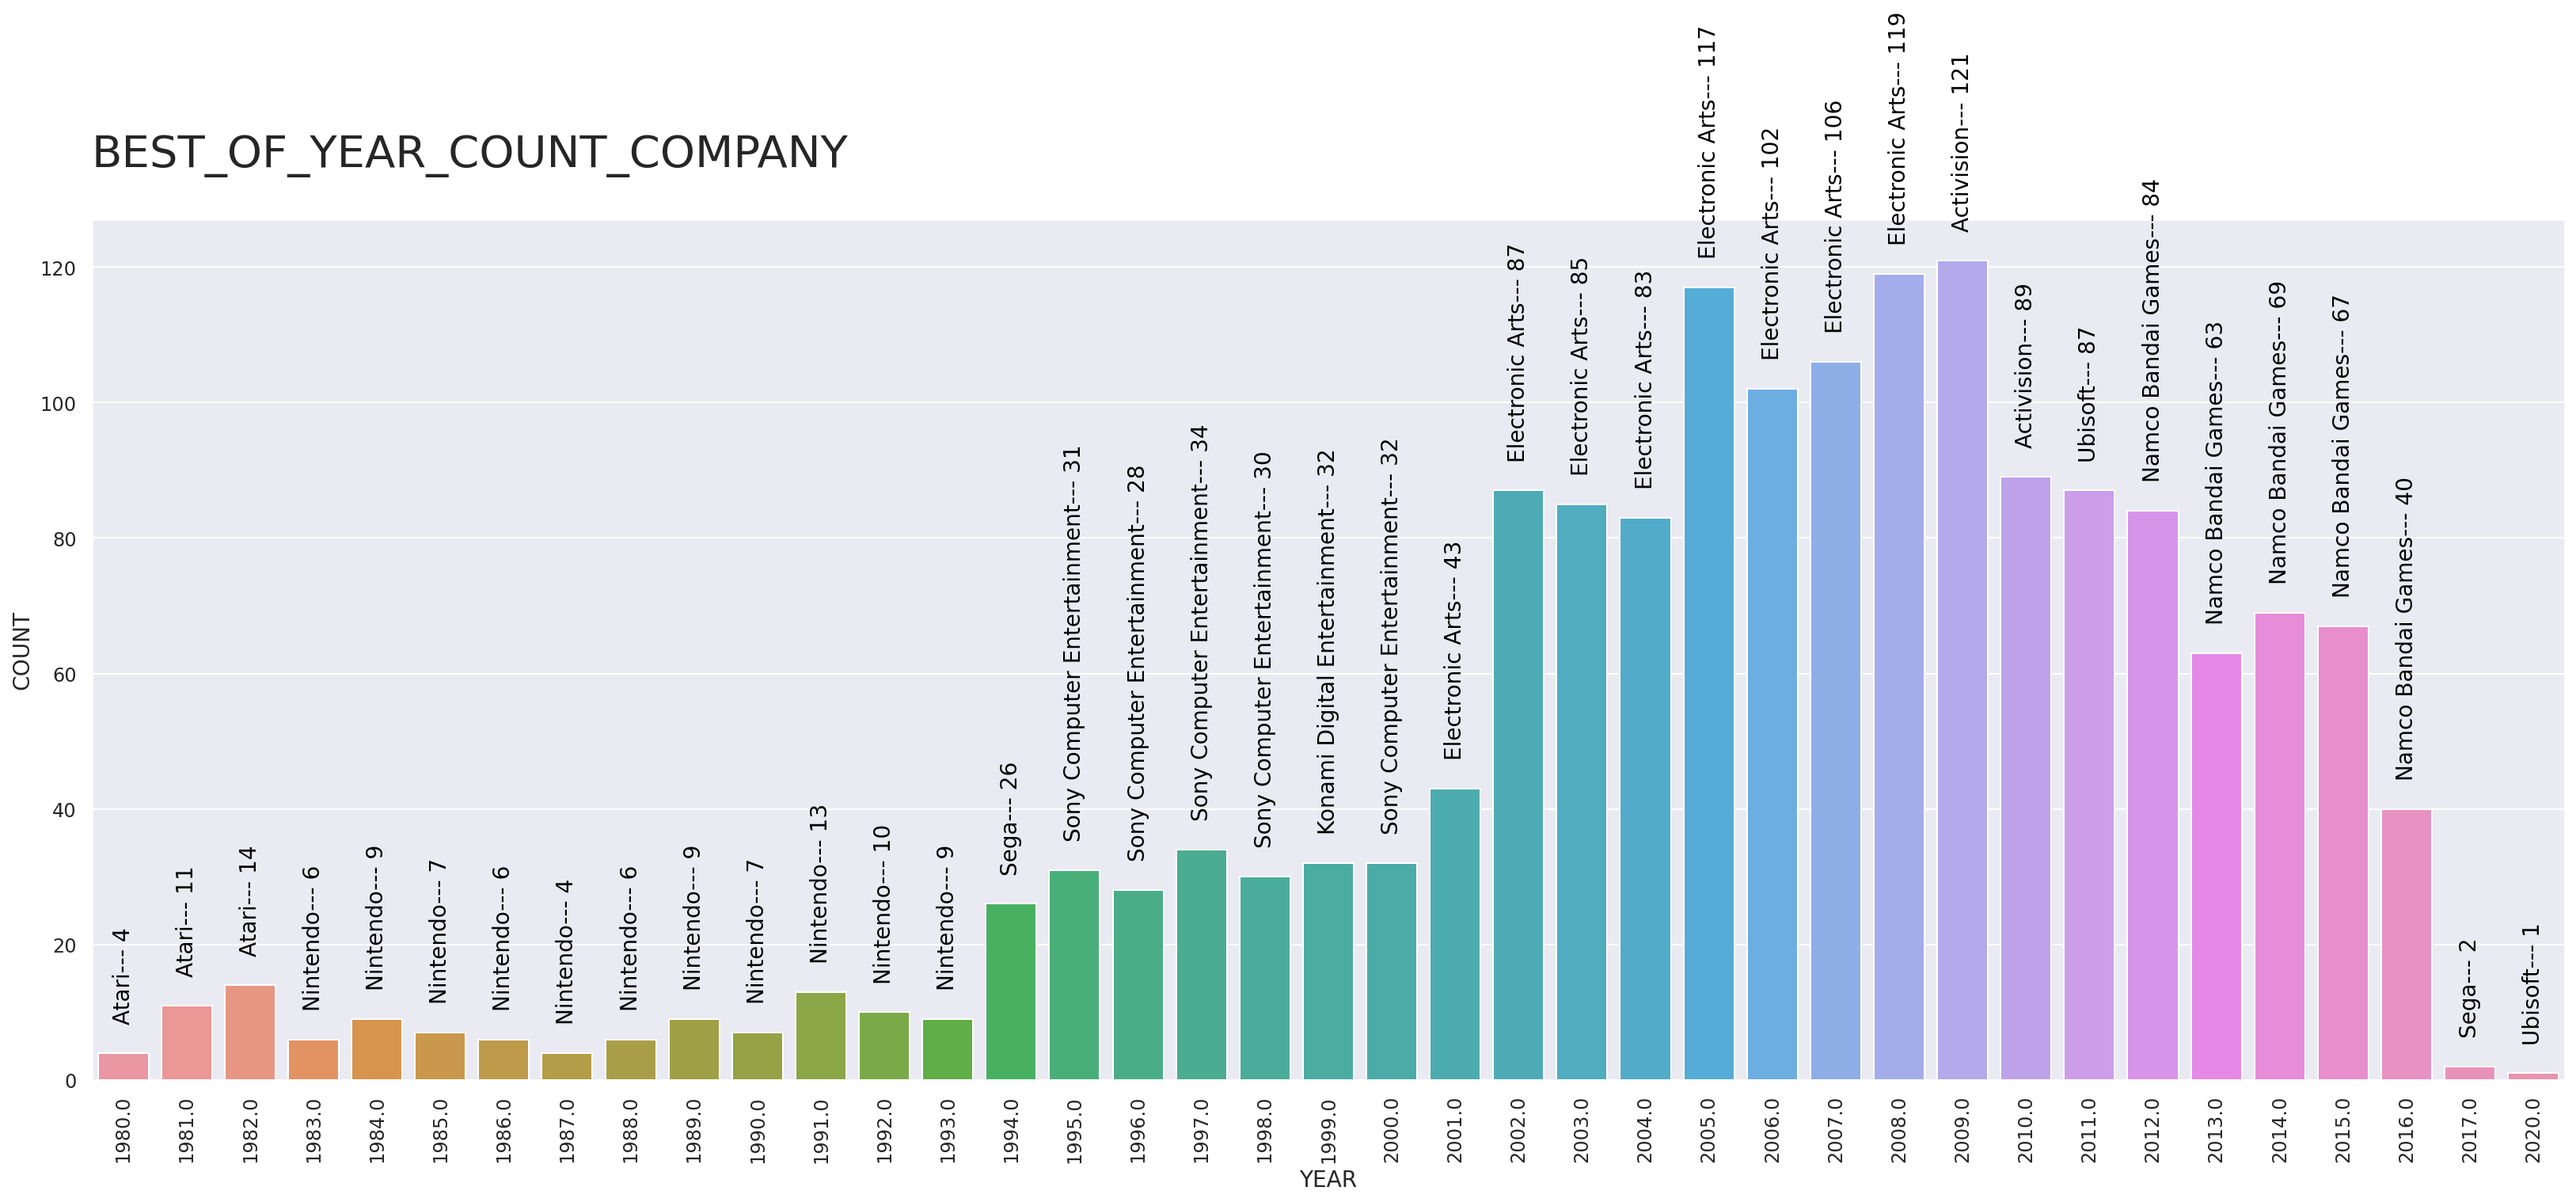

In [83]:
# 년도별 최고 출시량 회사 데이터 프레임 만들기
year_max = df1.groupby(['Year', 'Publisher']).size().reset_index(name='count')
being = year_max['count'] == year_max.groupby(['Year'])['count'].transform(max)
year_max = year_max[being]
# year_max[:15]

# 중복값 제외하기
year_max = year_max.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max.columns = ['YEAR', 'COMPANY', 'COUNT']


publisher = year_max.COMPANY



# 그래프 그리기
plt.figure(figsize=(28,10))
ax = sns.barplot(x='YEAR', y='COUNT', data=year_max)
idx = 0
for value in year_max['COUNT']:
    ax.text(x=idx, y=value + 5, s=str(publisher[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('COUNT', fontsize=14)
ax.set_title('BEST_OF_YEAR_COUNT_COMPANY', fontsize=28, y=1.05, loc='left')
plt.show()

In [ ]:
#80~90년 후반까지 일본회사 게임이 주류를 이루었다.
#2000년대 이후로 북미회사 게임들이 높은 출시량을 선도했다.
#2012년대 부터는 남코 일본회사가 출시량이 높았다.

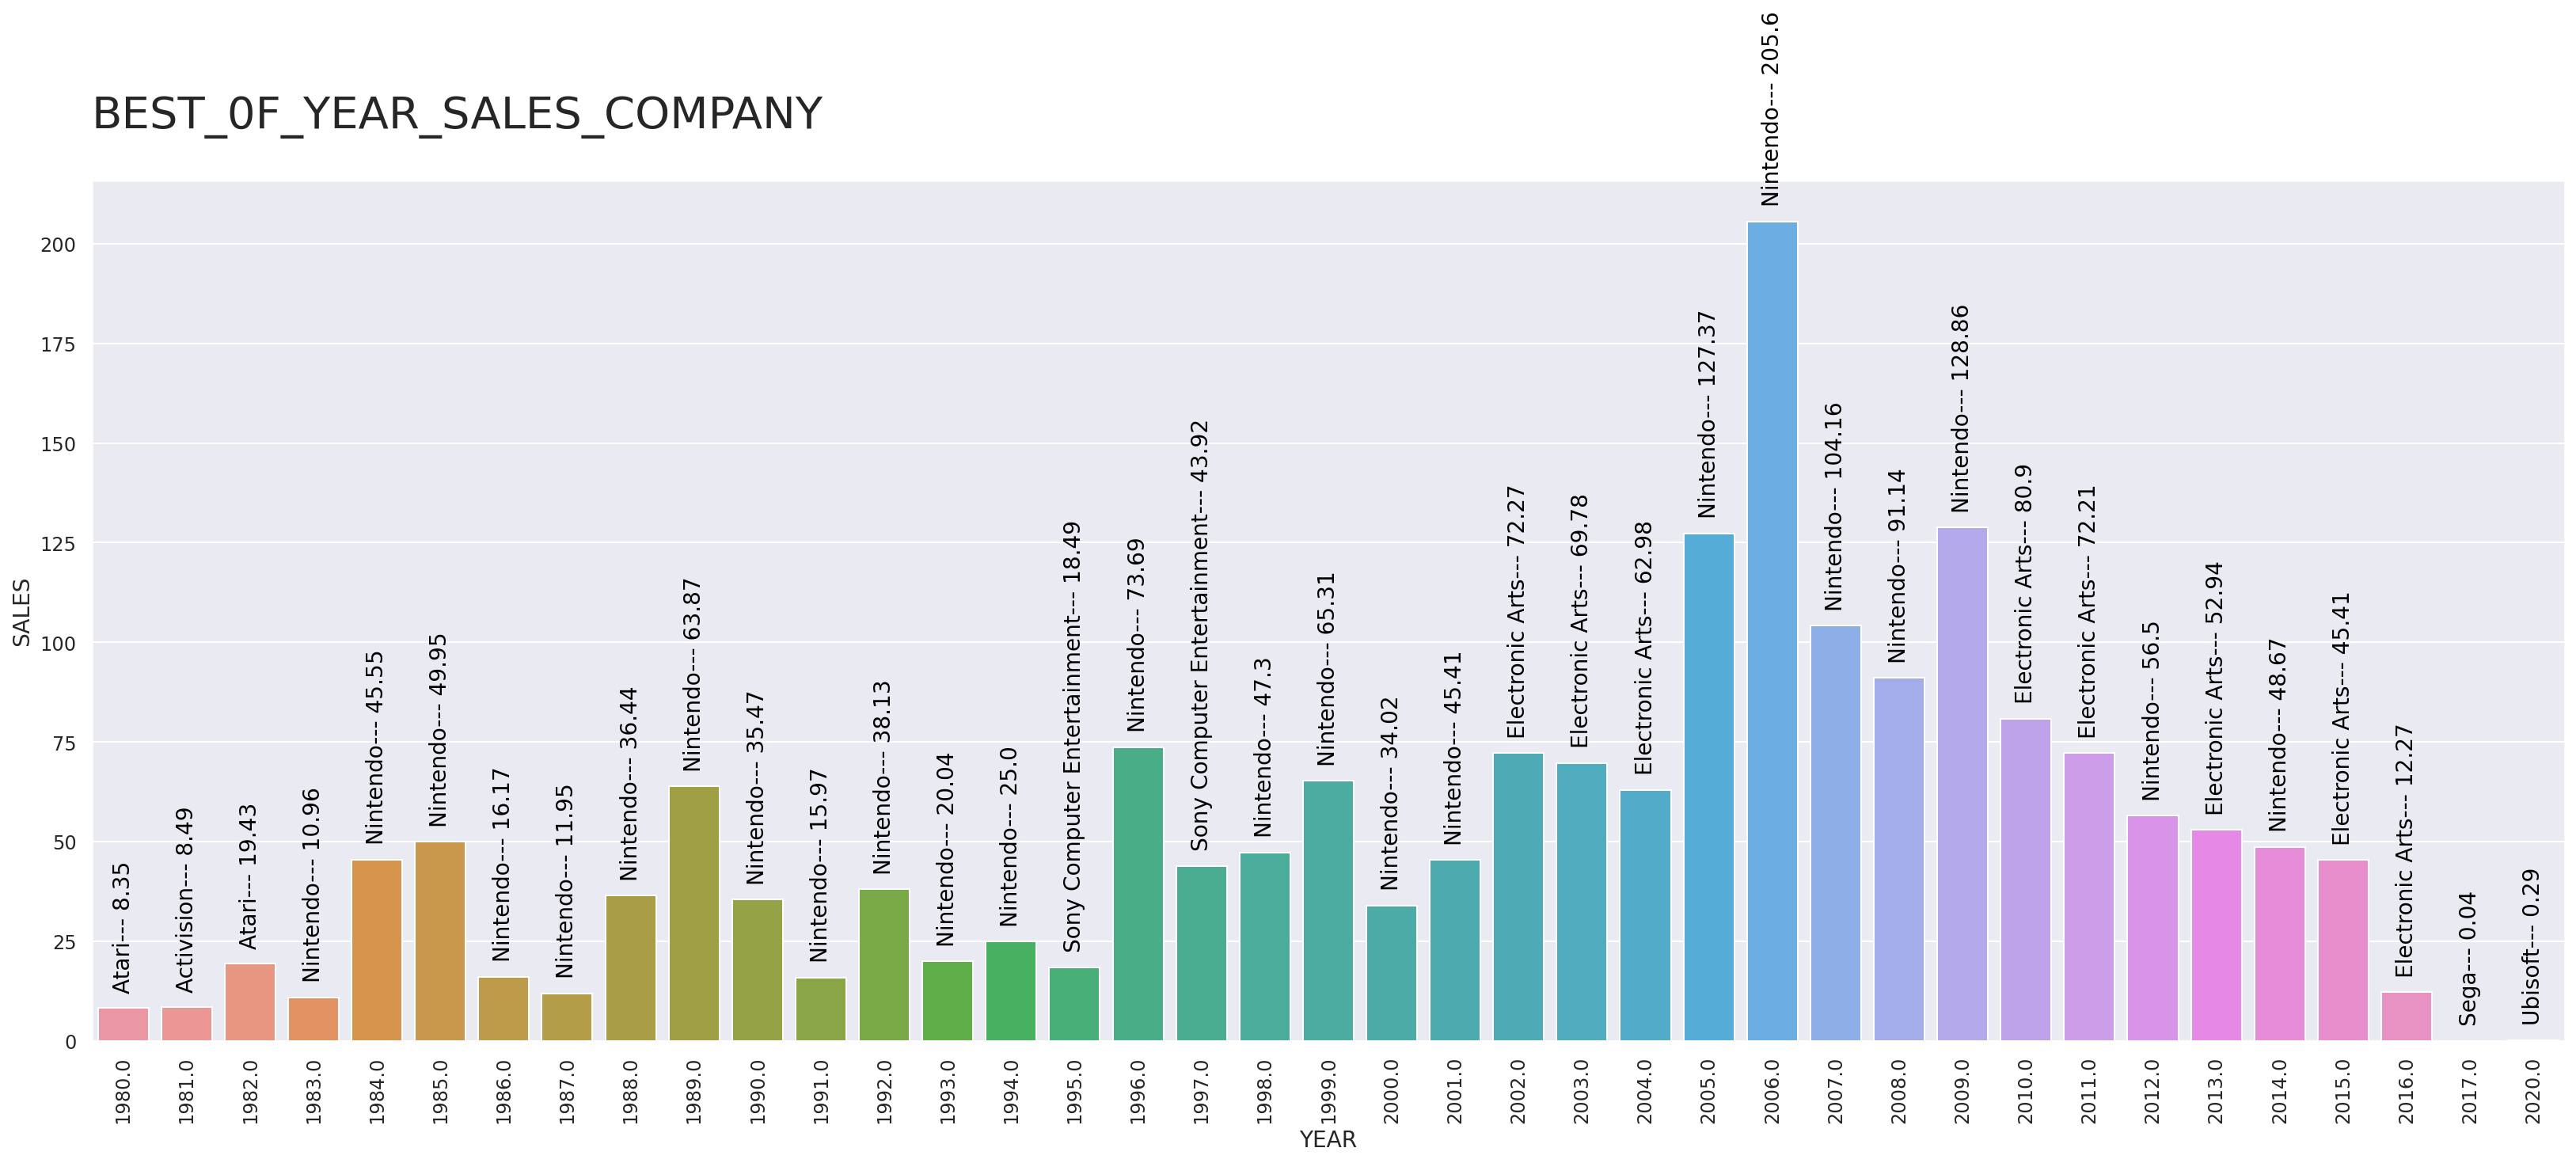

In [84]:
# 년도별 최고 판매량 회사
year_sales = df1.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index(name='sales')
being = year_sales['sales'] == year_sales.groupby(['Year'])['sales'].transform(max)
year_sales = year_sales[being]

# 중복값 마지막값이외에 제외하기
year_sales = year_sales.drop_duplicates(subset=['Year','sales'], keep='last').reset_index(drop=True)

year_sales.columns = ['YEAR', 'COMPANY', 'SALES']

publisher = year_sales.COMPANY

plt.figure(figsize=(28,10))
ax = sns.barplot(x='YEAR', y='SALES', data=year_sales)
idx = 0
for value in year_sales['SALES']:
    ax.text(x=idx, y=value + 5, s=str(publisher[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('SALES', fontsize=14)
ax.set_title('BEST_0F_YEAR_SALES_COMPANY', fontsize=28, y=1.05, loc='left')
plt.show()

In [ ]:
# 2012년대 남코 회사가 출시량이 많았던과 별개로 판매량까지 이어지지않았다.
# 닌텐도는 꾸준한 높은 출시량이 판매량에서도 흥행이 되었다.
# EA 회사의 2000년대 높은 출시량이 판매량으로 이어졌다.
# 소니 EA는 출시량에 비해 닌텐도에게 판매량이 밀려졌다.

#결론 
# 출고량이 높은 장르 액션 을 제작하며 각 나라별로 플레이스테이션 이 고루 판매되었고 최근 10년내에 GTA 나 콜오브듀티 장르가 액션 슛팅게임인걸 알수있다.
# 내가 다음분기에 게임을 설계할거면 플랫폼은 소니 플레이스테이션 게임 장르는 액션 어드밴쳐 위주인 게임을 제작할것이다. 